In [73]:
import pickle
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


label=pd.read_pickle(r'C:\Users\Shiva\Downloads\_______\Project B\train_norm_labels.pickle')
resample=pd.read_pickle(r'C:\Users\Shiva\Downloads\_______\Project B\train_resample.pickle')
data=pd.DataFrame(object)
pd.set_option('display.max_rows', None)

print(len(resample))
np.shape(resample)
df= np.array(resample)
df=df.reshape(925,400)
df.shape


925


(925, 400)

In [61]:
print(label)
label.shape

[[0.5        0.5       ]
 [0.5        0.53333333]
 [0.5        0.56666667]
 ...
 [1.         0.06666667]
 [1.         0.03333333]
 [1.         0.        ]]


(925, 2)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(df, label, test_size=0.3)


KNN model 1


In [77]:
from skmultilearn.adapt import MLkNN
grayson= (k=5)
grayson.fit(X_train,y_train)
y_pred = grayson.predict(X_test)



from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Unknown label type: 'continuous-multioutput'

Model 2

Shape of X: (925, 400)
Shape of transformed X: (925, 400)


ValueError: 'c' argument has 1850 elements, which is inconsistent with 'x' and 'y' with size 925.

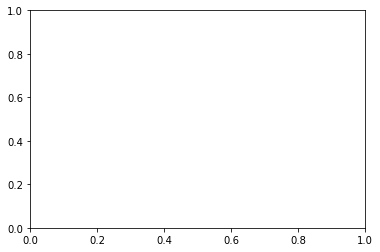

In [93]:
class PCA:

    def __init__(self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None

    def fit(self, X):
        self.mean = np.mean(X,axis=0)
        X=X - self.mean

        cov=np.cov(X.T)

        eigenvalues, eigenvectors =np.linalg.eig(cov)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.components= eigenvectors[0: self.n_components]
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)

if __name__ == "__main__":
 import matplotlib.pyplot as plt
 
 X= df
 y=label

 pca=PCA(400)
 pca.fit(X)
 X_projected= pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)


x1= X_projected[:,0]
x2=X_projected[:,1]

plt.scatter(
    x1,x2, c=y, edgecolor="none", alpha=0.8,cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

In [94]:
from sklearn import tree
X = df
Y = label
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

ValueError: Unknown label type: 'continuous-multioutput'

In [99]:
from sklearn.linear_model import LogisticRegression

Drake=LogisticRegression(X_train)
Drake.fit(X_train)


TypeError: fit() missing 1 required positional argument: 'y'